In [1]:
#agregar directorio de scripts como referencia
import sys
sys.path.append('scripts/')
#importar funciones creadas
import data_checker as dc
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ver graficos en linea
% matplotlib inline 

In [3]:
#path setting
full_path = '2018-11-01/'
last_date = '2018-06-30'
mylist = 'indexs/2018-06-30__cryptomc100_coins.txt'

In [4]:
#función de creación de df por nombre de columna
def maindf_by_colname(mylist, column_name, full_path, last_date, vartype=float): 
    #date base
    df = dc.read_pickle(full_path, 'BTC')
    df = dc.normalize_df(df, last_date)
    df = df[[column_name]]
    df.rename(columns={column_name:'BTC'}, inplace=True)
    #store the coins in array    
    array = [line.rstrip() for line in open(mylist)]
    #prepare lists to store symbols by filter
    for symbol in array:
        if symbol != 'BTC':
            df_symbol = dc.read_pickle(full_path, symbol)
            df_symbol = dc.normalize_df(df_symbol, last_date)
            df_symbol = df_symbol[[column_name]]
            df_symbol.rename(columns={column_name:symbol}, inplace=True)
            df = df.join(df_symbol)
    #df = df.astype(vartype)         
    return df

In [5]:
#crear dataframes de precios, volumenes y retornos
df_prices = maindf_by_colname(mylist, 'Close', full_path, last_date, float) 
df_prices  = df_prices.astype(float)  
df_volume = maindf_by_colname(mylist, 'Volume', full_path, last_date, int)
df_volume = df_volume.fillna(value=0)
returns = df_prices.pct_change()
returns = returns[1:]
#crear df de activos ordenados por liquidez
df_liquidity = df_volume[-90:].astype(int).sum().sort_values(ascending = False)

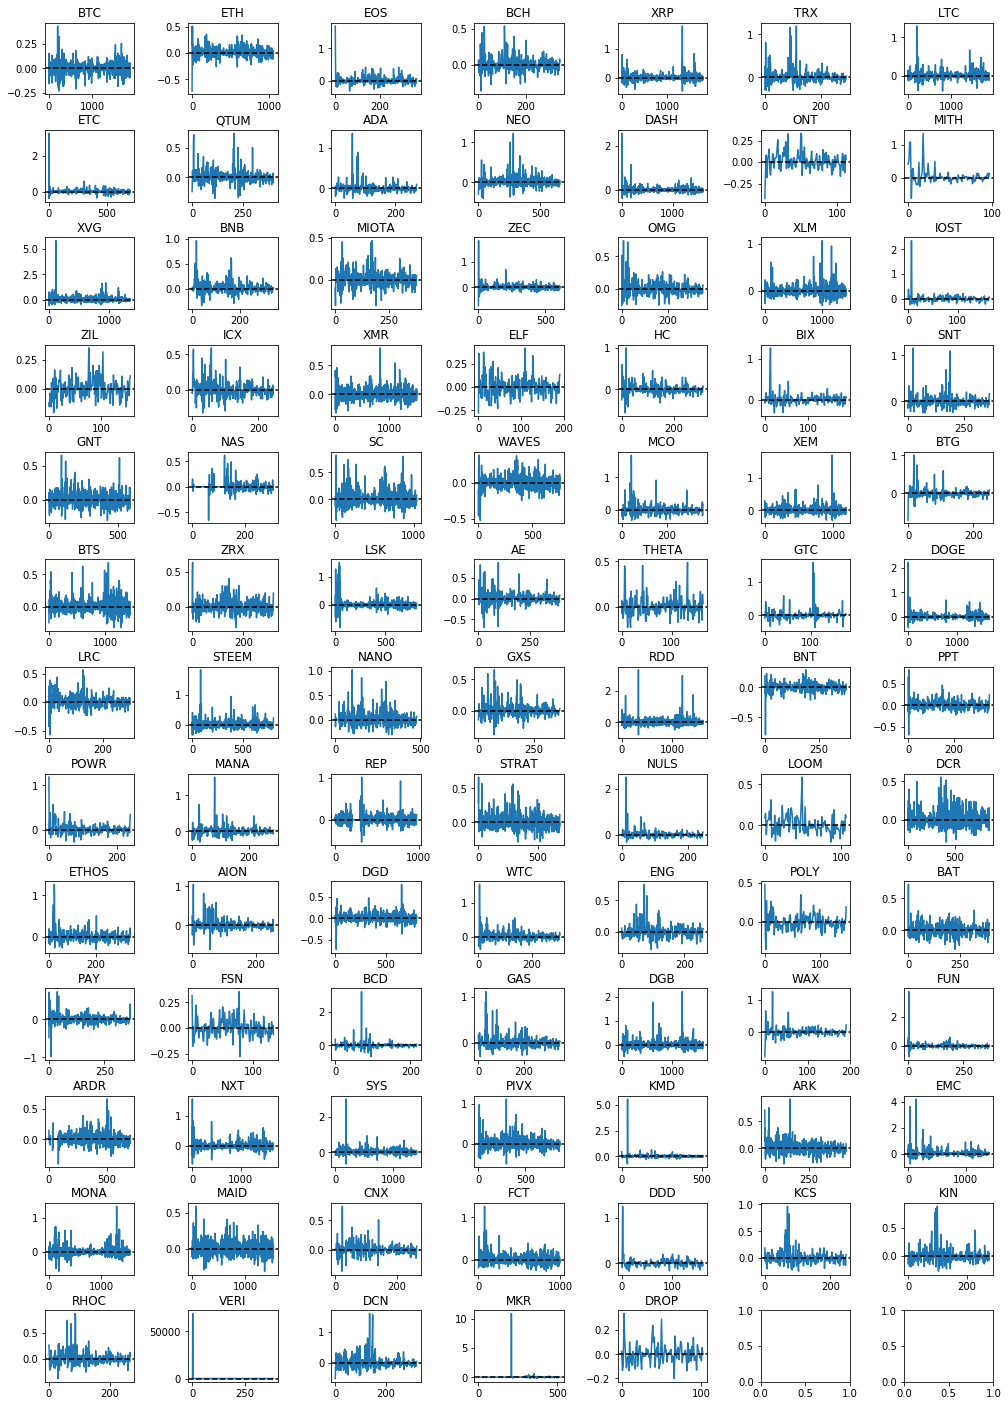

In [12]:
#crear gráfico con retornos 
fig, ax = plt.subplots(13, 7, figsize=(17,25), squeeze=False)
fig.subplots_adjust(hspace=0.5, wspace=0.6)
row_counter = 0
col_counter = 0
for symbol in df_liquidity.index:
    counter2 =  int(row_counter / 7)
    if col_counter == 7:
        col_counter = 0
    date = returns[symbol].first_valid_index()
    symbol_returns = returns[symbol][returns[symbol].index >= date]
    x = range(0,len(symbol_returns.index))
    ax[counter2, col_counter].plot(x,symbol_returns)
    ax[counter2, col_counter].axhline(0,color='black',ls='--')
    ax[counter2, col_counter].set_title(symbol)
    row_counter += 1
    col_counter += 1

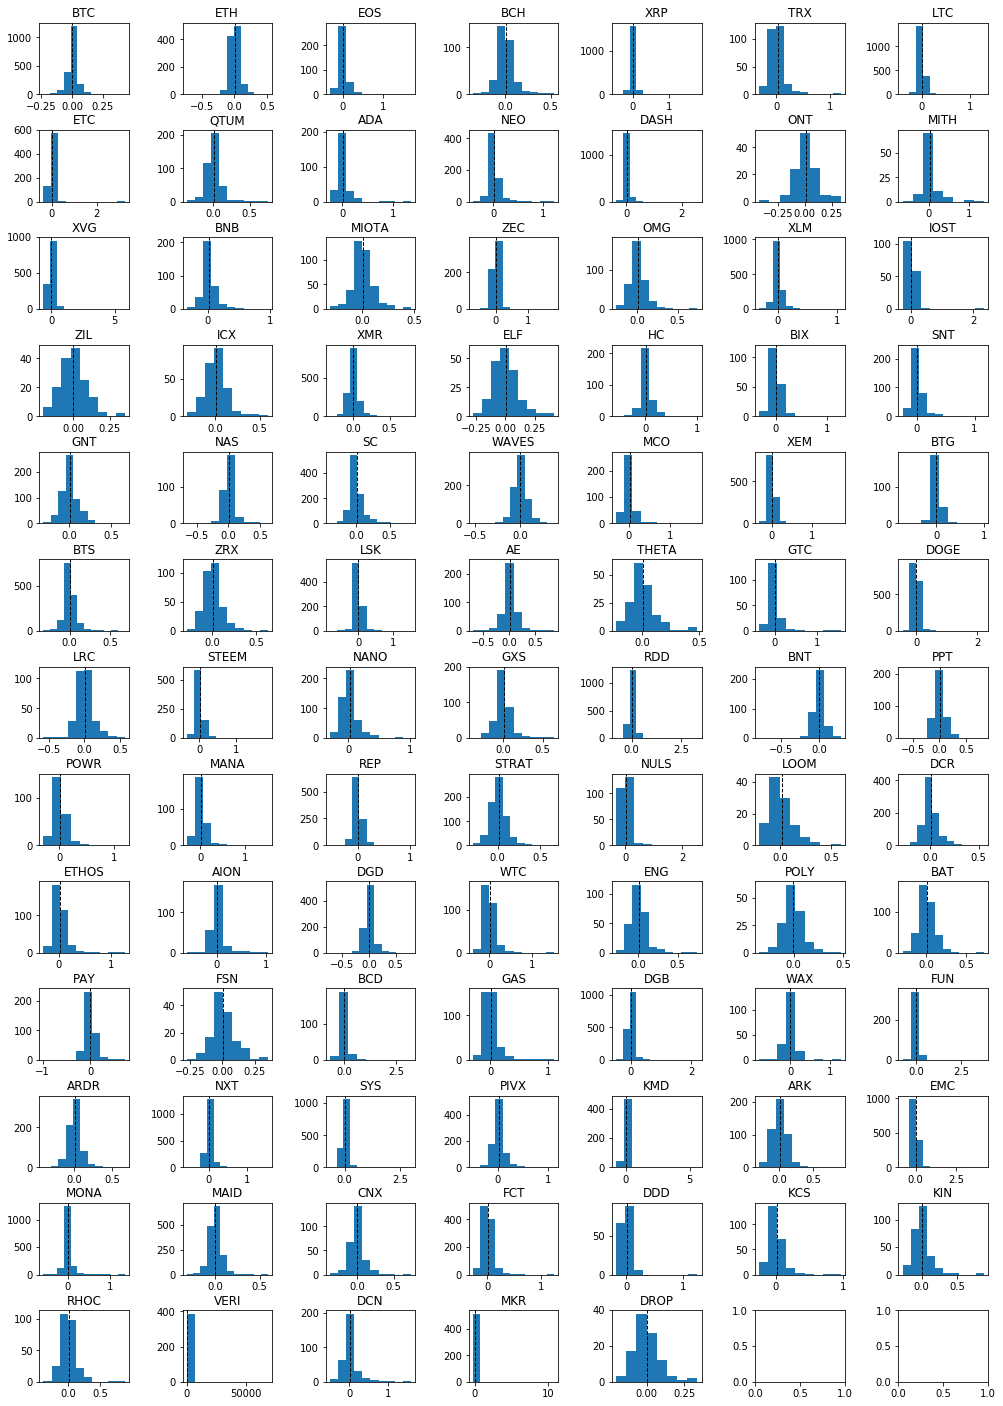

In [14]:
#crear histogramas de retornos para los activos criptograficos seleccionados
fig, ax = plt.subplots(13, 7, figsize=(17,25), squeeze=False)
fig.subplots_adjust(hspace=0.5, wspace=0.6)
row_counter = 0
col_counter = 0
for symbol in df_liquidity.index:
    counter2 =  int(row_counter / 7)
    if col_counter == 7:
        col_counter = 0
    date = returns[symbol].first_valid_index()
    symbol_returns = returns[symbol][returns[symbol].index >= date]
    k = int(np.ceil(1+np.log2(len(symbol_returns))))
    ax[counter2, col_counter].hist(symbol_returns, bins = k)
    ax[counter2, col_counter].axvline(symbol_returns.mean(), color='k', linestyle='dashed', linewidth=1) #media
    ax[counter2, col_counter].set_title(symbol)
    row_counter += 1
    col_counter += 1

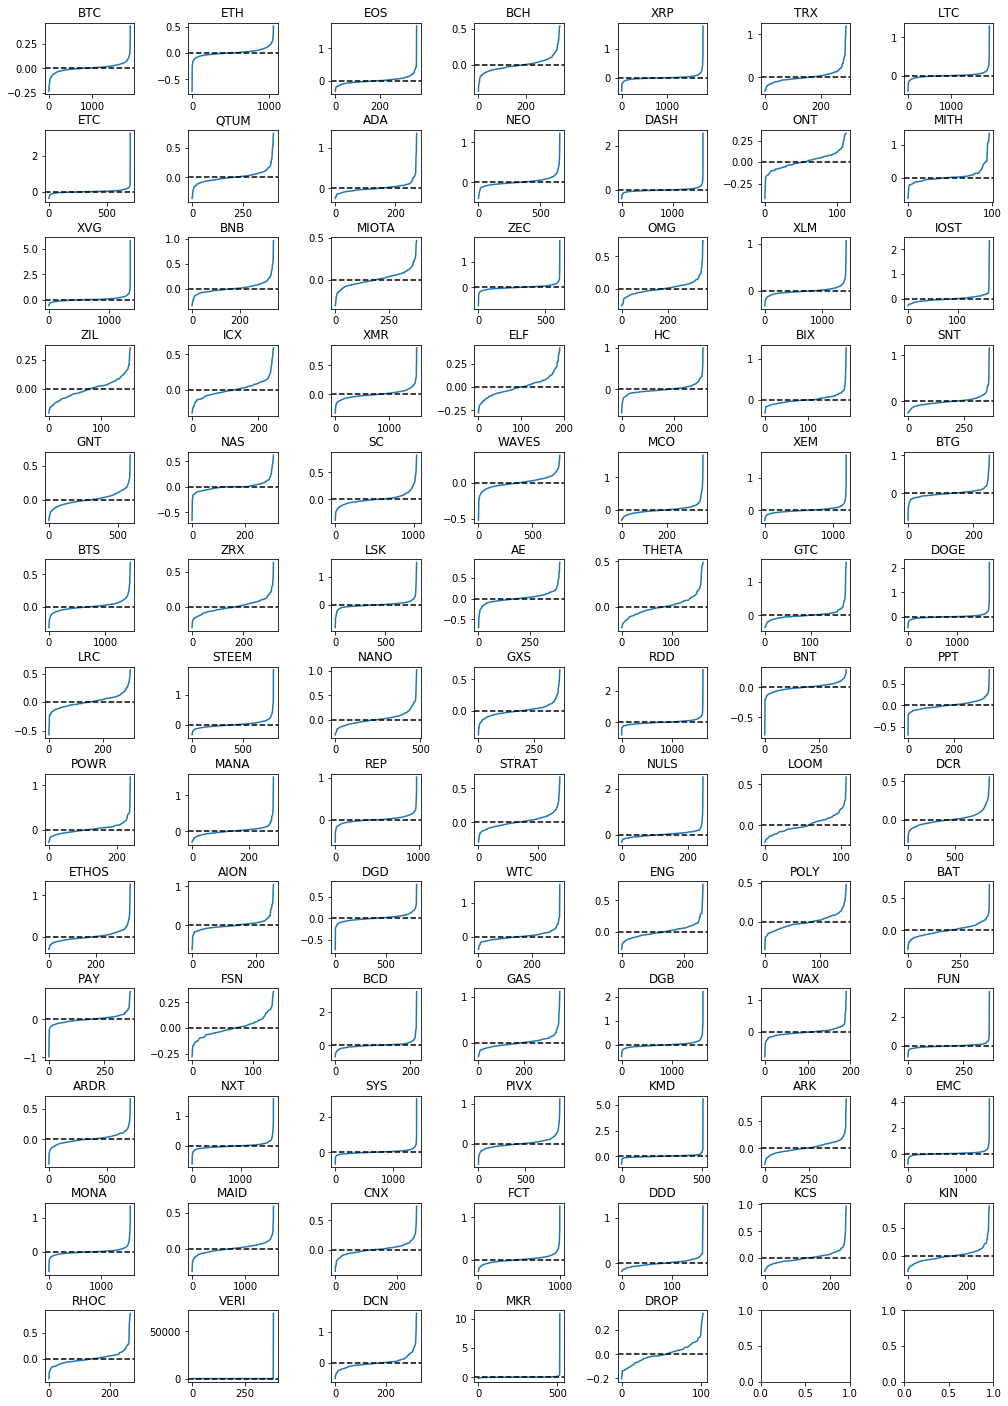

In [15]:
#crear gráfico con retornos ordenados (menor a mayor)
fig, ax = plt.subplots(13, 7, figsize=(17,25), squeeze=False)
fig.subplots_adjust(hspace=0.5, wspace=0.6)
row_counter = 0
col_counter = 0
for symbol in df_liquidity.index:
    counter2 =  int(row_counter / 7)
    if col_counter == 7:
        col_counter = 0
    date = returns[symbol].first_valid_index()
    symbol_returns = returns[symbol][returns[symbol].index >= date]
    x = range(0,len(symbol_returns.index))
    ax[counter2, col_counter].plot(x,sorted(symbol_returns))
    ax[counter2, col_counter].axhline(0,color='black',ls='--')
    ax[counter2, col_counter].set_title(symbol)
    row_counter += 1
    col_counter += 1